In [1]:
%load_ext tensorboard

In [2]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
data_dir = 'D:\\Projects\\dl-tl-mini-project\\assets\\data'
arabic_alphabet = ['ع', 'ال', 'أ', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']
arabic_alphabet_latin = os.listdir(f'{data_dir}\\ArASL_Database_54K')

In [4]:
def load_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

In [5]:
data = pd.read_csv(f'{data_dir}\\ArSL_Data_Labels.csv')
data.drop(columns=['#'], inplace=True)
data.columns = ['image', 'class']
data

,image,class
0,AIN (1).JPG,ain
1,AIN (10).JPG,ain
2,AIN (100).jpg,ain
3,AIN (1000).JPG,ain
4,AIN (1001).JPG,ain
...,...,...
54044,ZAY (995).jpg,zay
54045,ZAY (996).jpg,zay
54046,ZAY (997).jpg,zay
54047,ZAY (998).jpg,zay


In [6]:
print(data['class'])

0        ain
1        ain
2        ain
3        ain
4        ain
        ... 
54044    zay
54045    zay
54046    zay
54047    zay
54048    zay
Name: class, Length: 54049, dtype: object


In [7]:
X = []
y = []

for i in range(data.shape[0]):
    img_path = os.path.join(data_dir + '\\ArASL_Database_54K\\' + data['class'][i], data['image'][i])
    img = load_image(img_path)
    X.append(img)
    y.append(arabic_alphabet_latin.index(data['class'][i]))    
    print(f'Processed images: {i+1}/{data.shape[0]}', end='\r')

print("\n")

X = np.array(X)
X = X.reshape((54049, 64, 64, 3))
y = np.array(y)

print(X.shape, y.shape)

Processed images: 54049/54049

(54049, 64, 64, 3) (54049,)


In [8]:
"""base_model = tf.keras.applications.EfficientNetB7(input_shape=(64, 64, 3), include_top=False, weights=None)

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2560, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])

model.load_weights('D:\\Projects\\dl-tl-mini-project\\model\\model_checkpoint2.keras')
model.summary()"""

model = tf.keras.models.load_model('D:\\Projects\\dl-tl-mini-project\\model\\model.keras')
model.summary()

d:\Projects\dl-tl-mini-project\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ (None, 2, 2, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2560)           │     6,556,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        81,952 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,017,433 (301.43 MB)

 Trainable params: 8,281,632 (31.59 MB)

 Non-trainable params: 62,454,167 (238.24 MB)

 Optimizer params: 8,281,634 (31.59 MB)

1690/1690 ━━━━━━━━━━━━━━━━━━━━ 3190s 2s/step


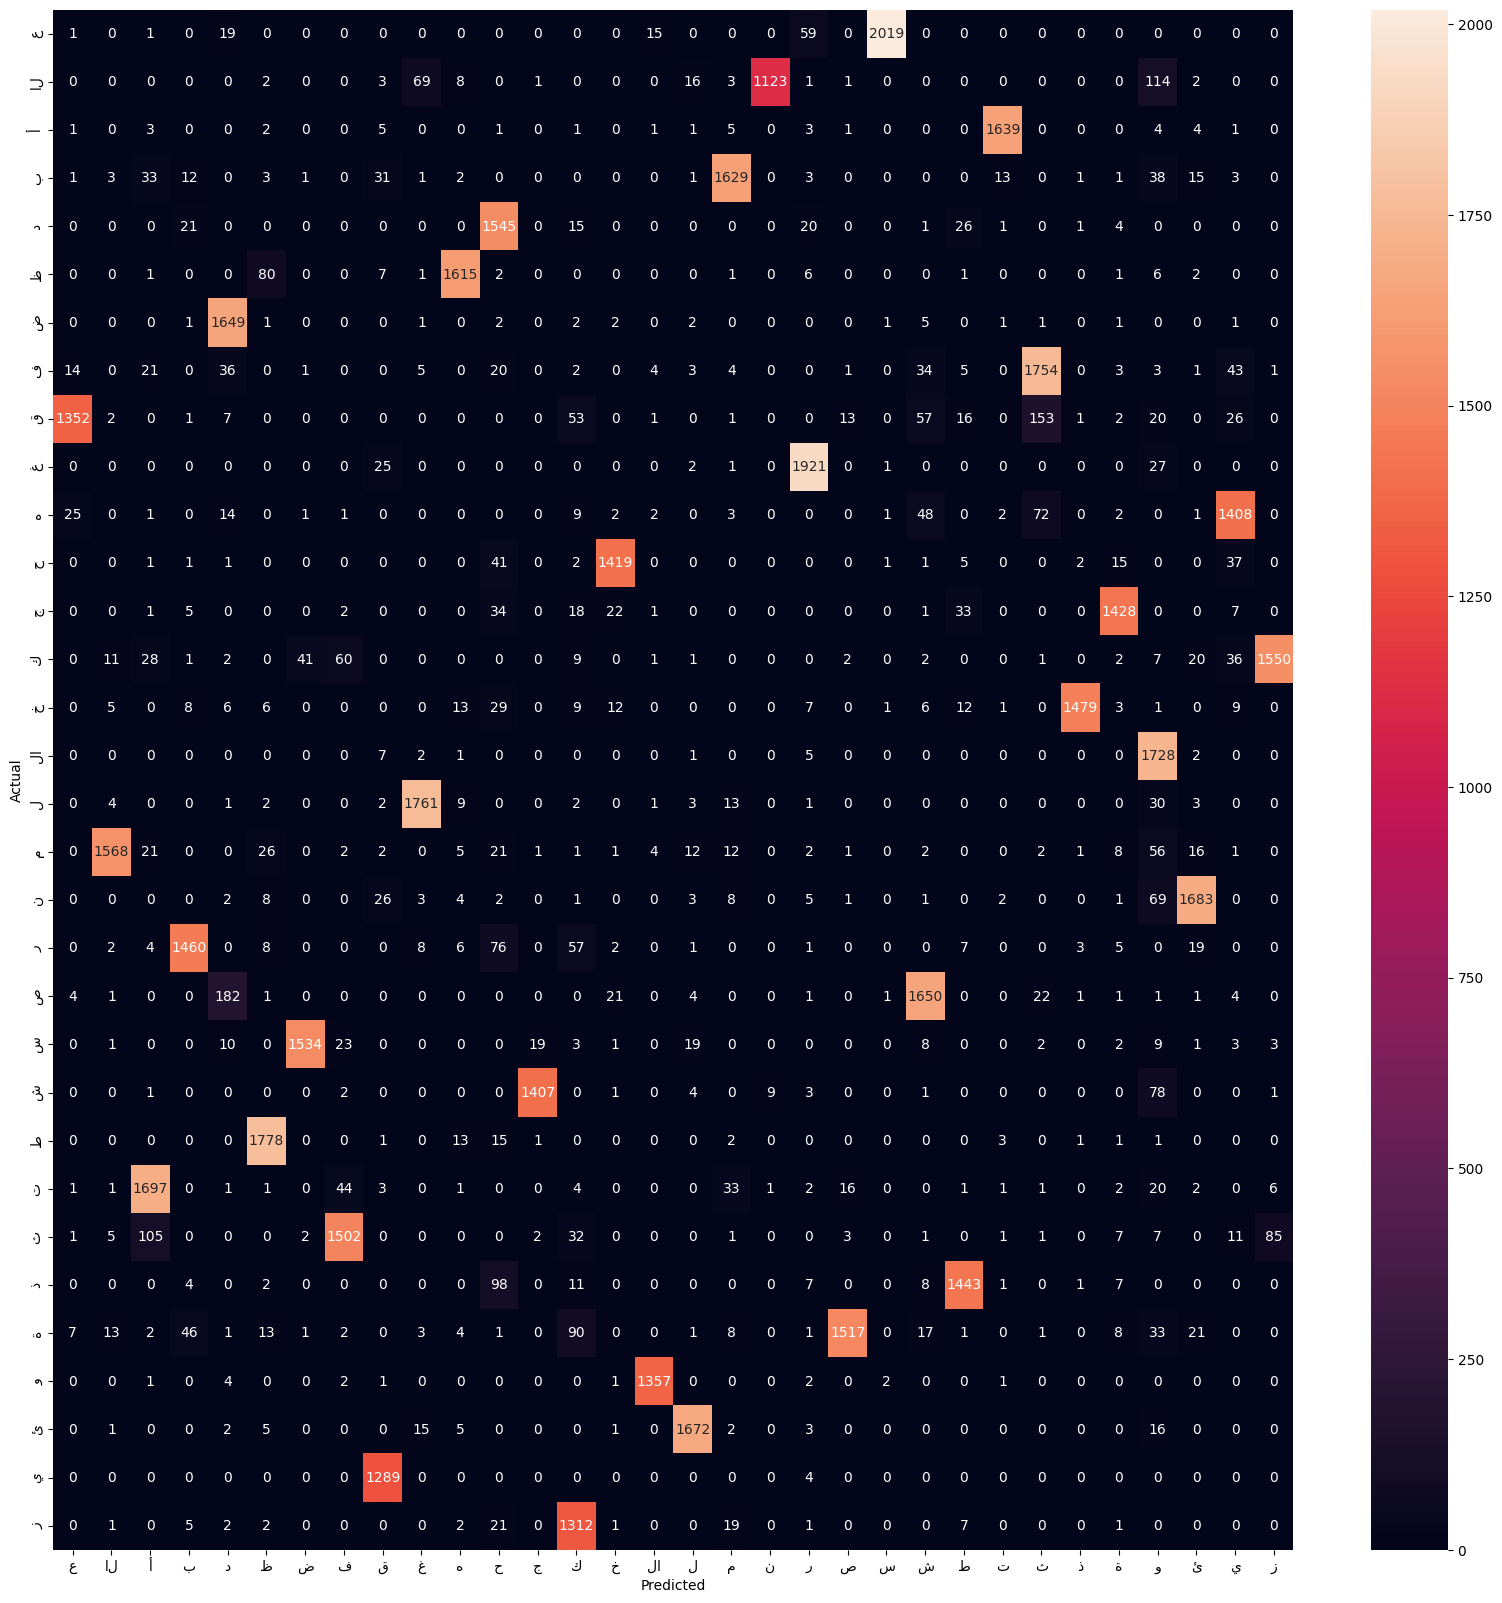

In [9]:
# evaluate the model
y_pred = model.predict(X)

# confusion matrix
cm = confusion_matrix(y, y_pred.argmax(axis=1))

# plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=arabic_alphabet, yticklabels=arabic_alphabet)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y, y_pred.argmax(axis=1))
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred.argmax(axis=1), target_names=arabic_alphabet))

Accuracy: 0.003441321763584895
              precision    recall  f1-score   support

           ع       0.00      0.00      0.00      2114
          ال       0.00      0.00      0.00      1343
           أ       0.00      0.00      0.00      1672
           ب       0.01      0.01      0.01      1791
           د       0.00      0.00      0.00      1634
           ظ       0.04      0.05      0.04      1723
           ض       0.00      0.00      0.00      1670
           ف       0.00      0.00      0.00      1955
           ق       0.00      0.00      0.00      1705
           غ       0.00      0.00      0.00      1977
           ه       0.00      0.00      0.00      1592
           ح       0.02      0.03      0.02      1526
           ج       0.00      0.00      0.00      1552
           ك       0.01      0.01      0.01      1774
           خ       0.01      0.01      0.01      1607
          لا       0.00      0.00      0.00      1746
           ل       0.00      0.00      0.00      1